In [43]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [44]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# 모멘텀 - SGD , 모멘텀 + 학습률 - Adam

In [77]:
series = np.sin(0.1 * np.arange(200)) 

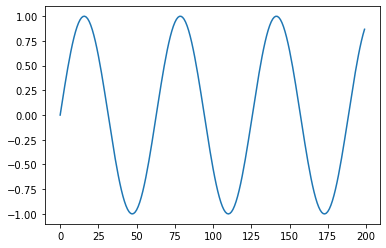

In [78]:
plt.plot(series)
plt.show()

### Build a Dataset

In [79]:
T = 10 # window size
X = []
Y = []

In [80]:
for t in range(len(series) - T):
    x = series[t : t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [81]:
X = np.array(X).reshape(-1 ,T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [82]:
# linear model
i = Input(shape=(T, ))
x = Dense(1)(i)

model = Model(i, x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss='mse', optimizer=Adam(lr=0.1))

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [84]:
# train the model
# X : 학습데이터, Y : 정답데이터 , epochs = 80, validation_data: 검증데이터
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 33ms/step - loss: 0.7078 - val_loss: 0.6198
Epoch 2/80
3/3 [==============================] - 0s 8ms/step - loss: 0.3246 - val_loss: 0.1938
Epoch 3/80
3/3 [==============================] - 0s 9ms/step - loss: 0.1252 - val_loss: 0.0177
Epoch 4/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0131 - val_loss: 0.0339
Epoch 5/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0508 - val_loss: 0.0857
Epoch 6/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0724 - val_loss: 0.1084
Epoch 7/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0711 - val_loss: 0.0576
Epoch 8/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0499 - val_loss: 0.0247
Epoch 9/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0223 - val_loss: 0.0103
Epoch 10/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0102 - val_loss: 0.0039
Epoch 11/80
3/3 [====================

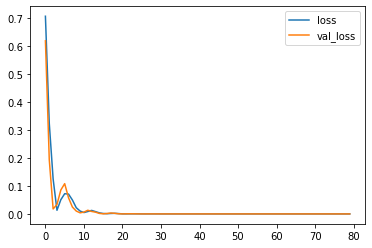

In [85]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

### "Wrong" forecast using true target

In [86]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N //2

while len(validation_predictions) < len(validation_target) :
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> Scalar
    i += 1
    
    validation_predictions.append(p)

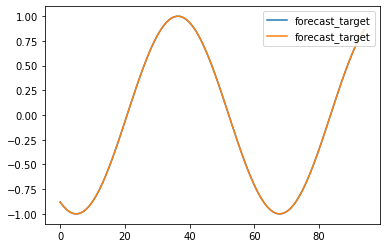

In [87]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predictions, label = 'forecast_target')
plt.legend()

In [88]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N //2
# last_train input
last_x = X[-N//2] 


In [89]:
print(len(validation_target))
print(last_x)

95
[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647]


In [90]:
print(last_x.reshape(1, -1))

[[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
  -0.62507065 -0.69987469 -0.76768581 -0.82782647]]


In [91]:
print(model.predict(last_x.reshape(1,-1))[0,0])

-0.8796963


In [92]:
while len(validation_predictions) < len(validation_target) :
    p = model.predict(last_x.reshape(1,-1))[0, 0] # 1 x 1 array -> scalar
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1) # circular 회전 시켜줌.
    last_x[-1] = p

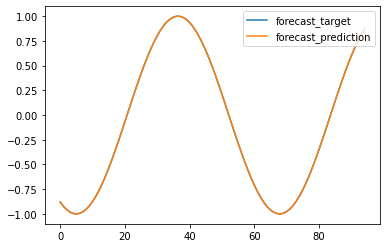

In [93]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predictions, label = 'forecast_prediction')
plt.legend()

### Noise Example

In [102]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

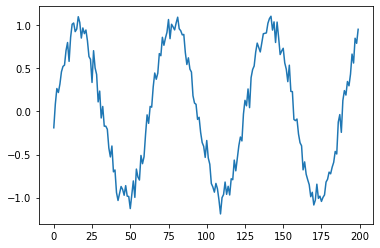

In [105]:
plt.plot(series)
plt.show()

In [106]:
T = 10 # window size
X = []
Y = []

In [107]:
for t in range(len(series) - T):
    x = series[t : t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [108]:
X = np.array(X).reshape(-1 ,T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [109]:
# linear model
i = Input(shape=(T, ))
x = Dense(1)(i)

model = Model(i, x)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(loss='mse', optimizer=Adam(lr=0.1))

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [111]:
# train the model
# X : 학습데이터, Y : 정답데이터 , epochs = 80, validation_data: 검증데이터
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 37ms/step - loss: 0.2826 - val_loss: 0.1846
Epoch 2/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1305 - val_loss: 0.0991
Epoch 3/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0724 - val_loss: 0.0251
Epoch 4/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0443 - val_loss: 0.0512
Epoch 5/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0457 - val_loss: 0.0504
Epoch 6/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0642 - val_loss: 0.0353
Epoch 7/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0487 - val_loss: 0.0403
Epoch 8/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0387 - val_loss: 0.0238
Epoch 9/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0342 - val_loss: 0.0207
Epoch 10/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0297 - val_loss: 0.0323
Epoch 11/80
3/3 [=============

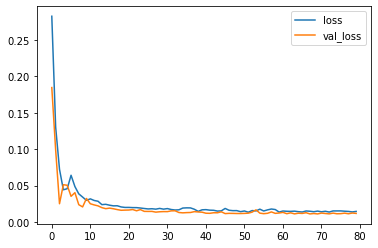

In [112]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

### "Wrong" forecast using true target

In [113]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N //2

while len(validation_predictions) < len(validation_target) :
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> Scalar
    i += 1
    
    validation_predictions.append(p)

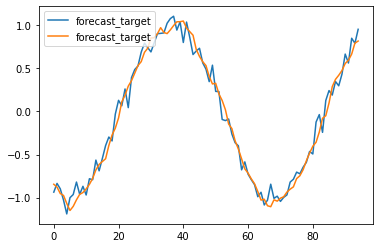

In [114]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predictions, label = 'forecast_target')
plt.legend()

In [115]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N //2
# last_train input
last_x = X[-N//2] 


In [116]:
print(len(validation_target))
print(last_x)

95
[-0.06744608 -0.241413   -0.35985382 -0.40442529 -0.53280588 -0.336648
 -0.5395577  -0.61246327 -0.83632156 -0.87640675]


In [117]:
print(last_x.reshape(1, -1))

[[-0.06744608 -0.241413   -0.35985382 -0.40442529 -0.53280588 -0.336648
  -0.5395577  -0.61246327 -0.83632156 -0.87640675]]


In [118]:
print(model.predict(last_x.reshape(1,-1))[0,0])

-0.8446809


In [119]:
while len(validation_predictions) < len(validation_target) :
    p = model.predict(last_x.reshape(1,-1))[0, 0] # 1 x 1 array -> scalar
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1) # circular 회전 시켜줌.
    last_x[-1] = p

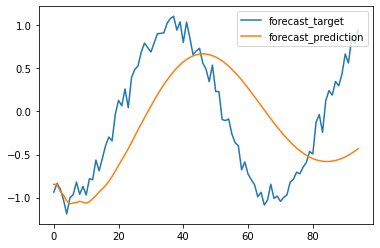

In [120]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predictions, label = 'forecast_prediction')
plt.legend()